**Project Title: Marketing Campaign for Banking Products**

      The bank has a growing customer base. The bank wants to increase customers base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
import io
from sklearn import datasets 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn import naive_bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [74]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (2).csv


In [75]:
df_val = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   object 
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          4999 non-null   float64
dtypes: float64(2), int64(11), object(1)
memory usage: 547.0+ KB


**Data Description**

In [76]:
#Describing the Datasets
df_val.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,4999.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.293859
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455574
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [77]:
df_val.isnull().tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
df_val.isnull().head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
df_val.dtypes

ID                     object
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard            float64
dtype: object

In [80]:
df_val.isnull().sum()  

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            1
dtype: int64

In [81]:
df_val.shape           #finding the shape of the datasets

(5000, 14)

In [82]:
df_val.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [83]:
#finding all dublicates values
df_val.duplicated

<bound method DataFrame.duplicated of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0         0.0
1        2   45          19  ...           0       0         0.0
2        3   39          15  ...           0       0         0.0
3        4   35           9  ...           0       0         0.0
4        5   35           8  ...           0       0         1.0
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1         0.0
4996  4997   30           4  ...           0       1         0.0
4997  4998   63          39  ...           0       0         0.0
4998  4999   65          40  ...           0       1         0.0
4999  5000   28           4  ...           0       1         1.0

[5000 rows x 14 columns]>

In [84]:
df_val.dropna().head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1.0


In [85]:
df_val.dropna().tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0.0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1.0


In [86]:
#List unique values in the train_df column
df_val.Age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

**perform various statistical tests on train datasets**

In [87]:
df_val.min()                    # lowest value in each column of the datasets

ID                       1.0
Age                     23.0
Experience              -3.0
Income                   8.0
ZIP Code              9307.0
Family                   1.0
CCAvg                    0.0
Education                1.0
Mortgage                 0.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   0.0
CreditCard               0.0
dtype: float64

In [88]:
df_val.median()                       #finding median each column of the datasets

Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [89]:
df_val.std()                               #finding the standard deviation of each column

Age                     11.463166
Experience              11.467954
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Personal Loan            0.294621
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455574
dtype: float64

**EDA: Study the data distribution in each attribute and target variable,share your findings**

In [90]:
df_val['Age'].unique()   

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [91]:
df_val['Income'].unique() 

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [92]:
df_val['Family'].unique()

array([4, 3, 1, 2])

In [93]:
df_val.nunique(dropna=False)  

ID                    4984
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               3
dtype: int64

In [94]:
df_val.nunique()   

ID                    4984
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [95]:
df_val.drop('ID',axis=1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0.0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0.0


In [96]:
df_val.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [97]:
experience = df_val['Experience']
age = df_val['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [98]:
(df_val.Mortgage==0).sum()

3462

In [99]:
df_val.Education.value_counts() 

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [100]:
df_val.Family.value_counts() 

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [101]:
(df_val.CCAvg==0).sum()

106

In [102]:
duplicate_rows_df = df_val[df_val.duplicated()]
print("Number of duplicate rows ", duplicate_rows_df)


Number of duplicate rows  Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [103]:
df_val['Experience'] = df_val['Experience'].abs()

df_val.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Encode categorical features as an integer array**

In [104]:
enc = OrdinalEncoder()
enc.fit_transform(df_val[['Income']])

array([[33.],
       [22.],
       [ 3.],
       ...,
       [14.],
       [33.],
       [61.]])

**VISUALIZING UNIVARIATE AND BIVARIATES**

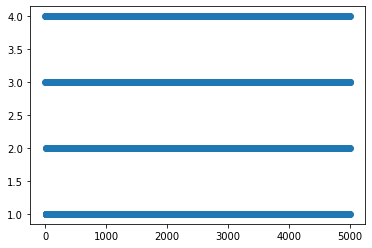

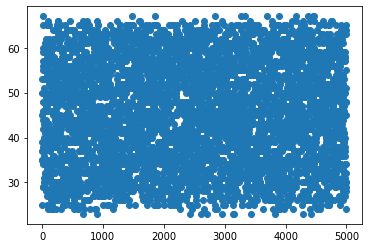

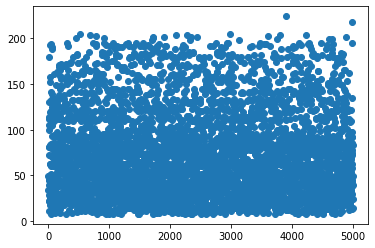

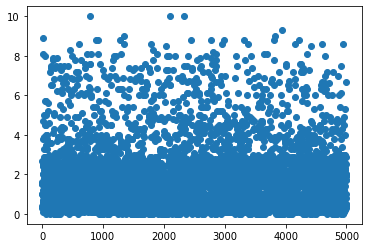

In [105]:
plt.scatter(df_val.index,df_val['Family'])
plt.show()
plt.scatter(df_val.index,df_val['Age'])
plt.show()
plt.scatter(df_val.index,df_val['Income'])
plt.show()
plt.scatter(df_val.index,df_val['CCAvg'])
plt.show()

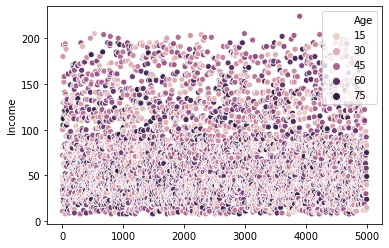

In [106]:
sns.scatterplot(x=df_val.index,y=df_val['Income'],hue=df_val['Age'])

No handles with labels found to put in legend.


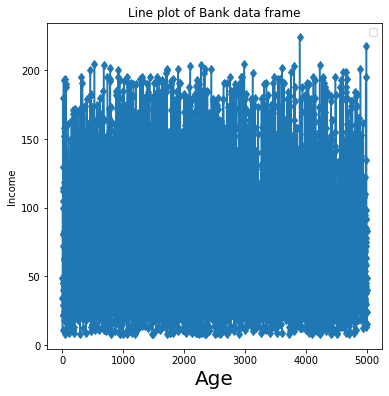

In [107]:
plt.figure(figsize=(6,6))
plt.title('Line plot of Bank data frame')
plt.xlabel('Age',fontsize=20)
plt.ylabel('Income',fontsize=10)
plt.plot(df_val.index,df_val['Income'],markevery=1,marker='d')     
plt.legend()
plt.show()

Text(0.5, 0, 'CCAvg')

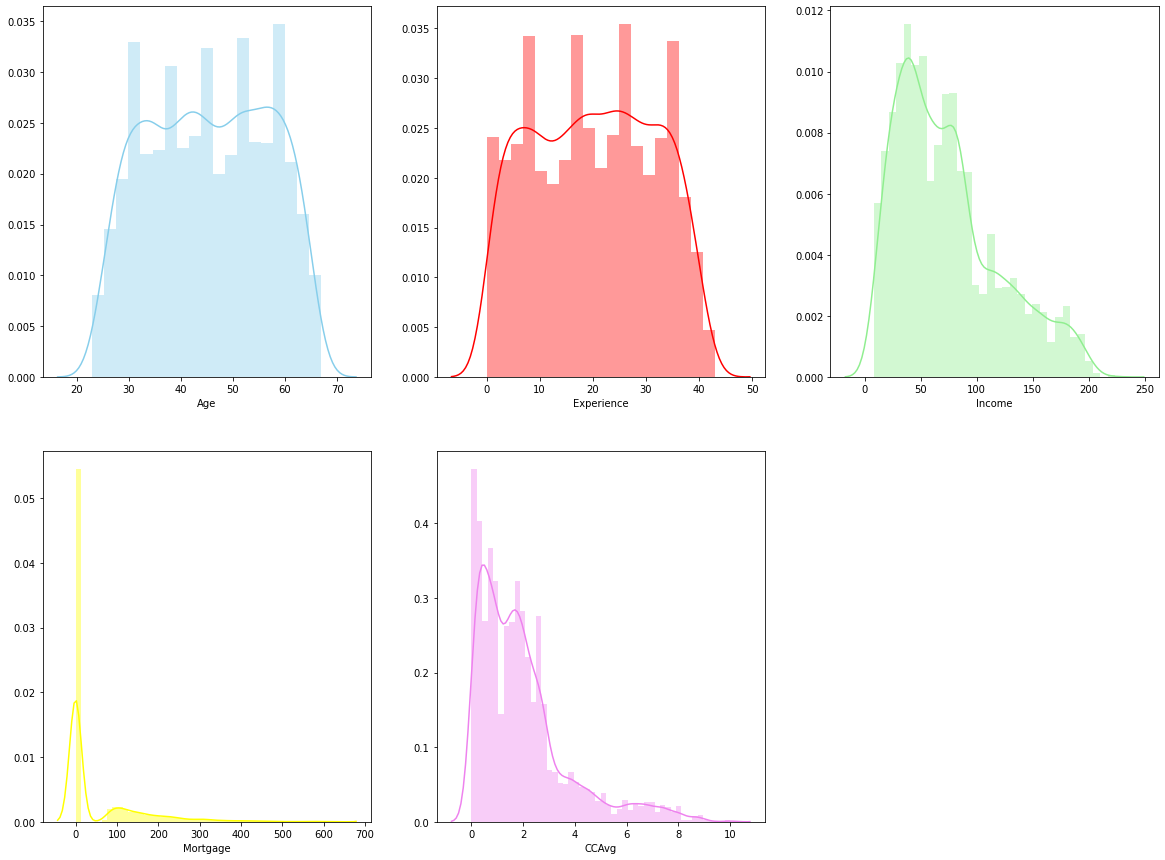

In [108]:
plt.figure(figsize= (20,15))
plt.subplot(2,3,1)
sns.distplot(df_val.Age, color='skyblue')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.distplot(df_val.Experience, color='red')
plt.xlabel('Experience')

plt.subplot(2,3,3)
sns.distplot(df_val.Income, color='lightgreen')
plt.xlabel('Income')

plt.subplot(2,3,4)
sns.distplot(df_val.Mortgage, color='yellow')
plt.xlabel('Mortgage')

plt.subplot(2,3,5)
sns.distplot(df_val.CCAvg, color='violet')
plt.xlabel('CCAvg')

Text(0.5, 0, 'CCAvg')

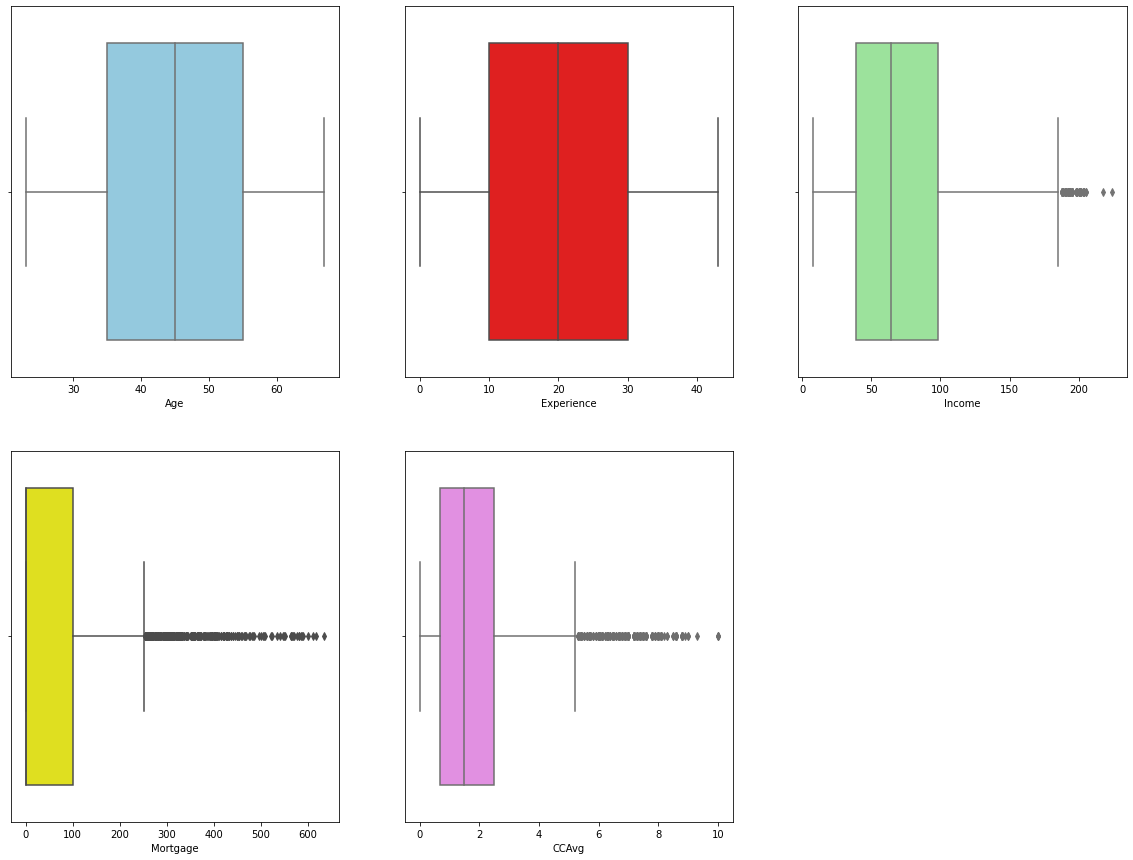

In [109]:
plt.figure(figsize= (20,15))             #subplot and boxplot
plt.subplot(2,3,1)
sns.boxplot(df_val.Age, color='skyblue')
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.boxplot(df_val.Experience, color='red')       
plt.xlabel('Experience')

plt.subplot(2,3,3)
sns.boxplot(df_val.Income, color='lightgreen')
plt.xlabel('Income')

plt.subplot(2,3,4)
sns.boxplot(df_val.Mortgage, color='yellow')
plt.xlabel('Mortgage')

plt.subplot(2,3,5)
sns.boxplot(df_val.CCAvg, color='violet')
plt.xlabel('CCAvg')

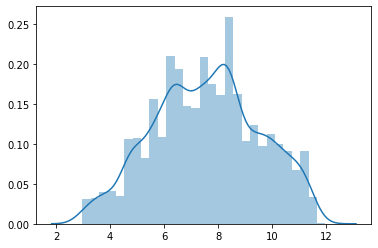

In [110]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df_val['Income'].values.reshape(-1,1))
temp=pt.transform(df_val["Income"].values.reshape(-1,1))
sns.distplot(temp)

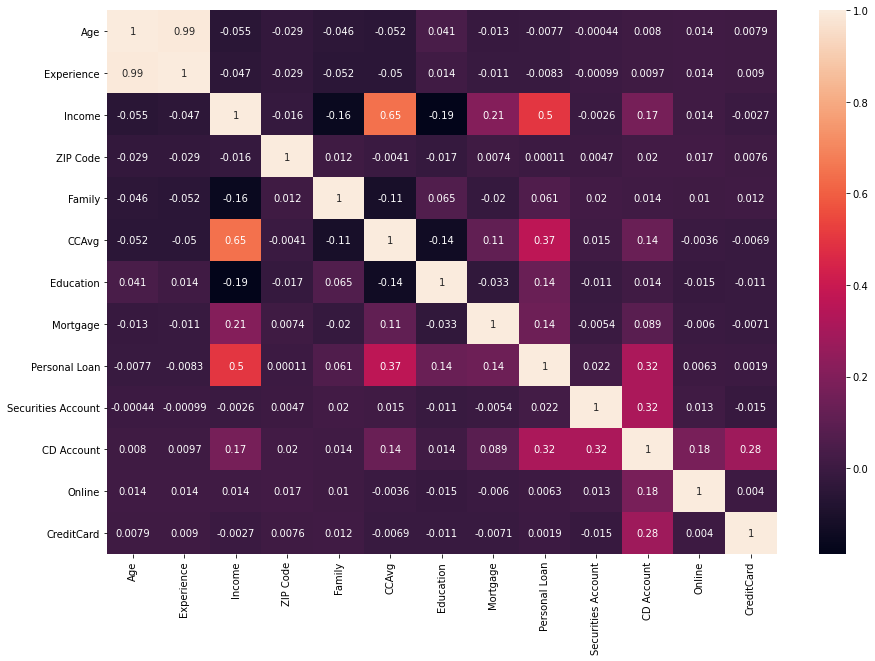

In [111]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_val.corr(),annot=True);

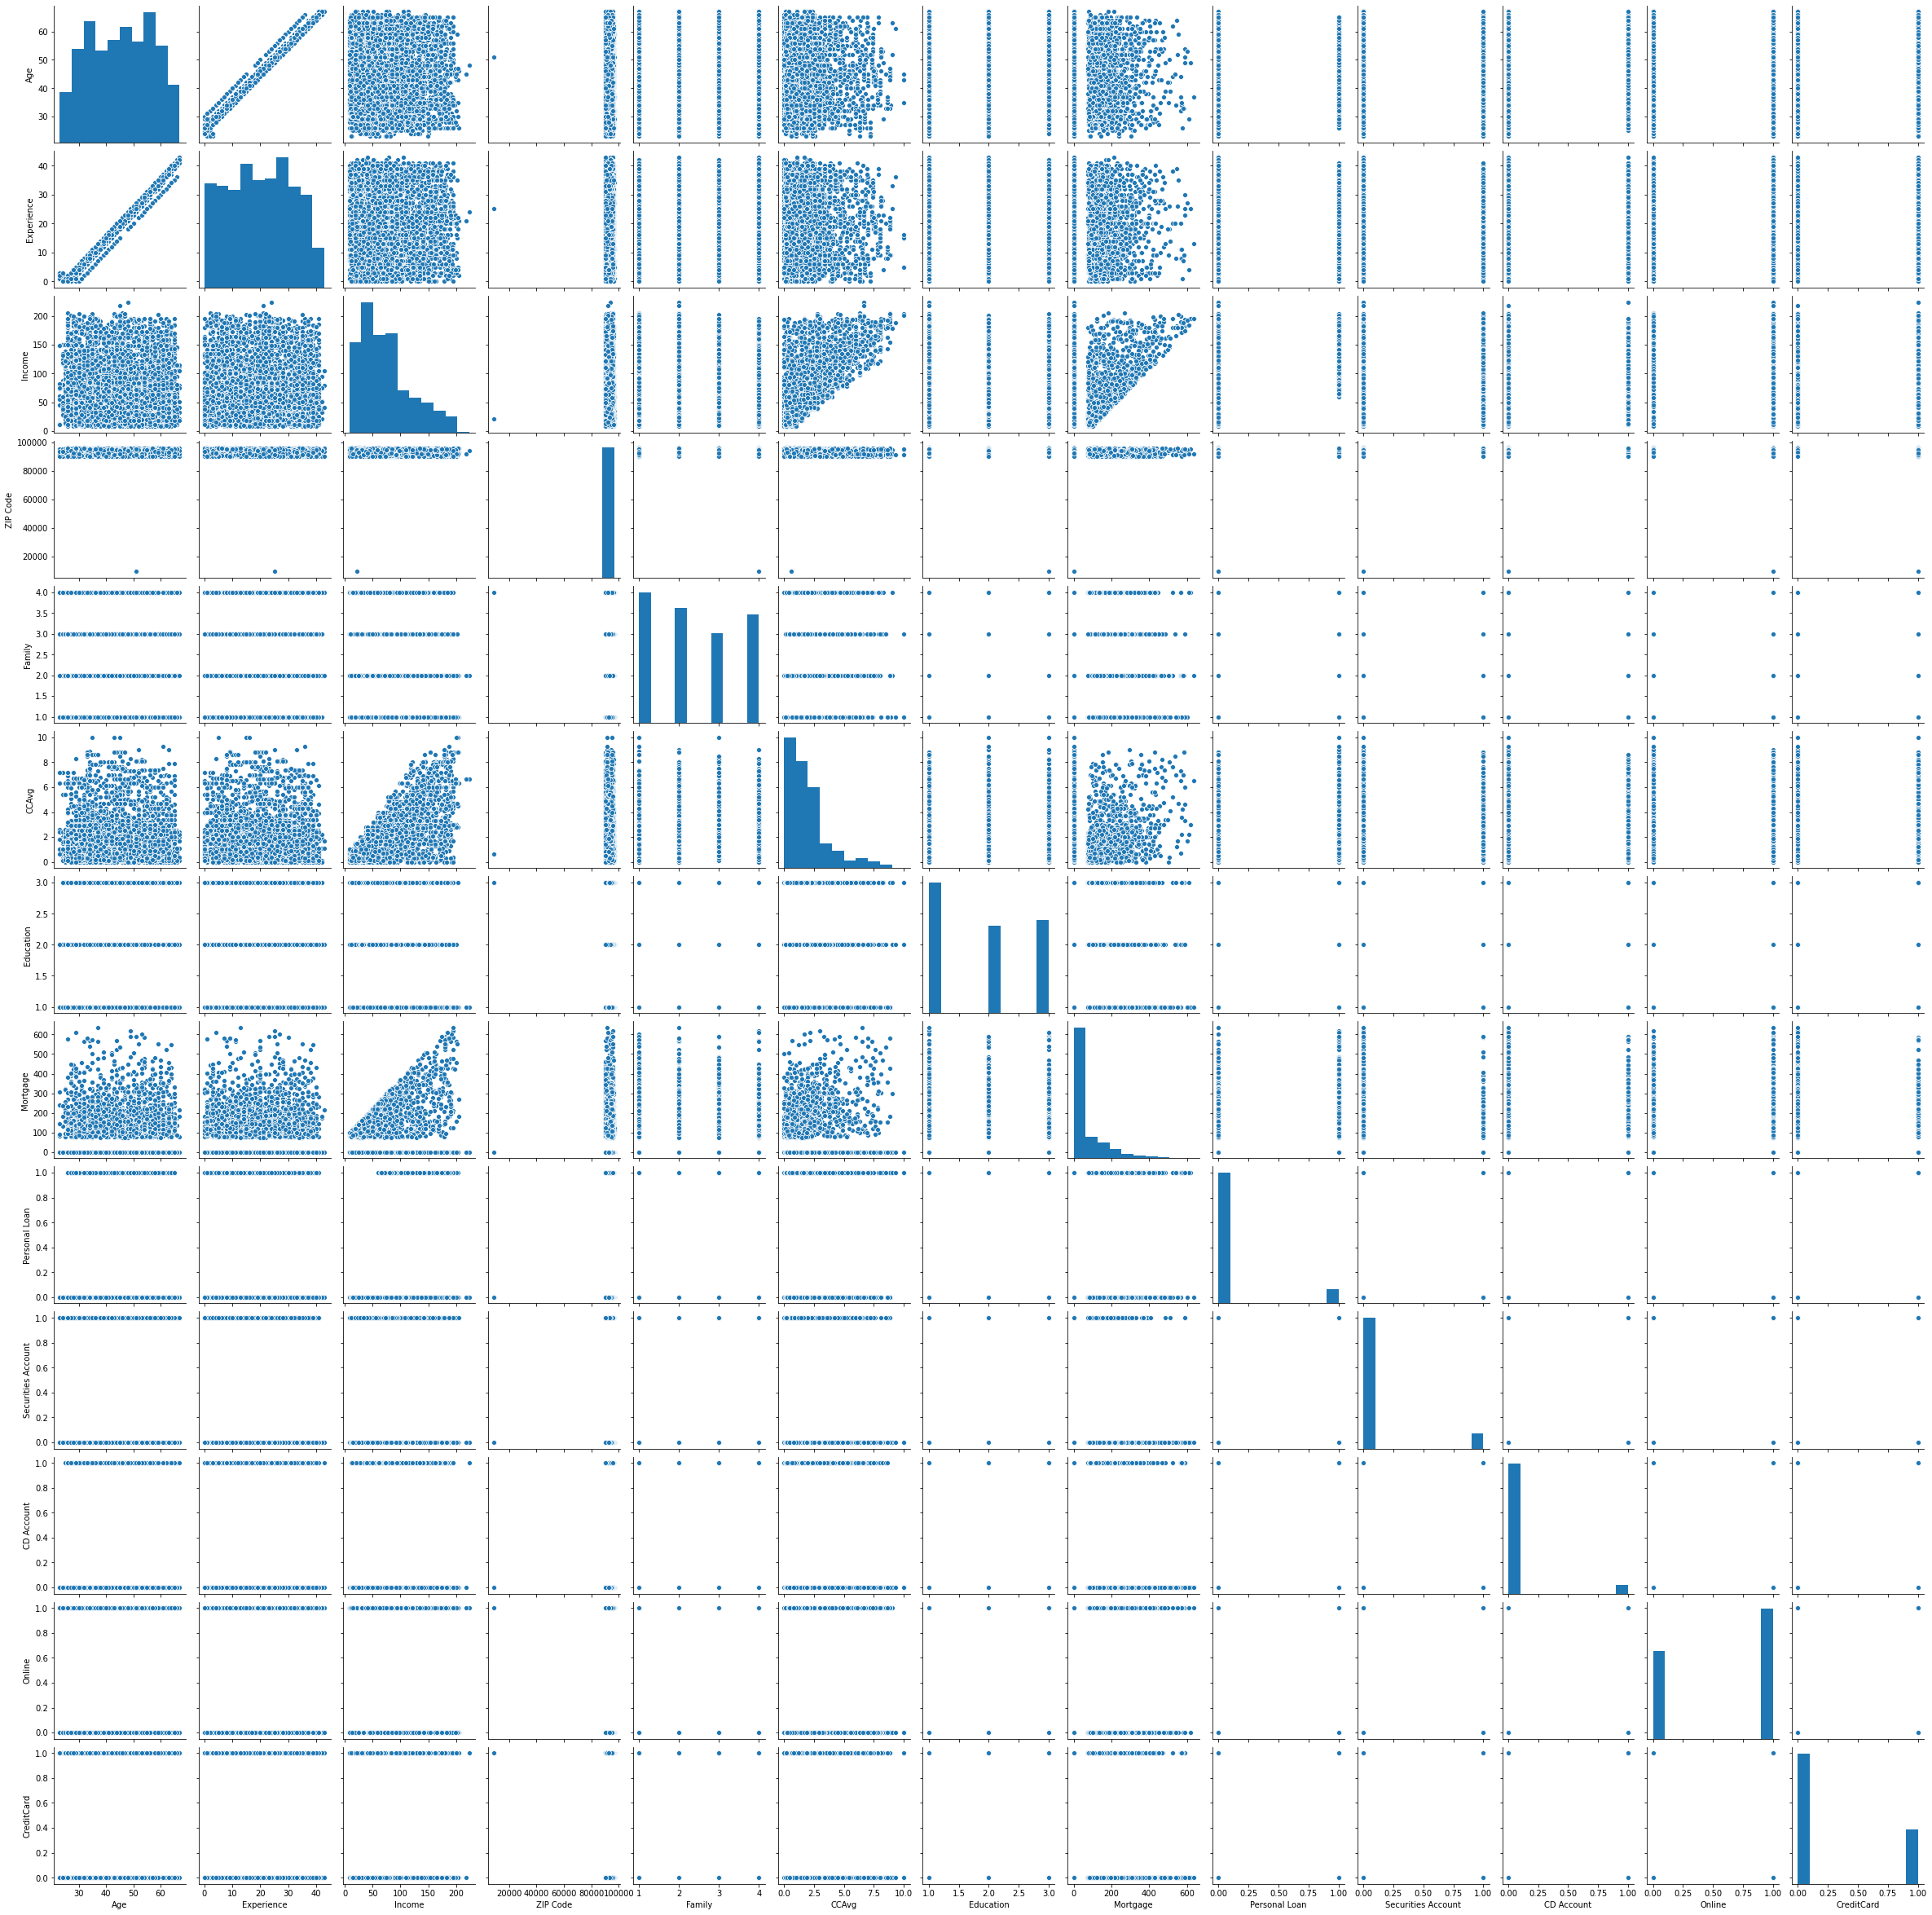

In [112]:
sns.pairplot(df_val)

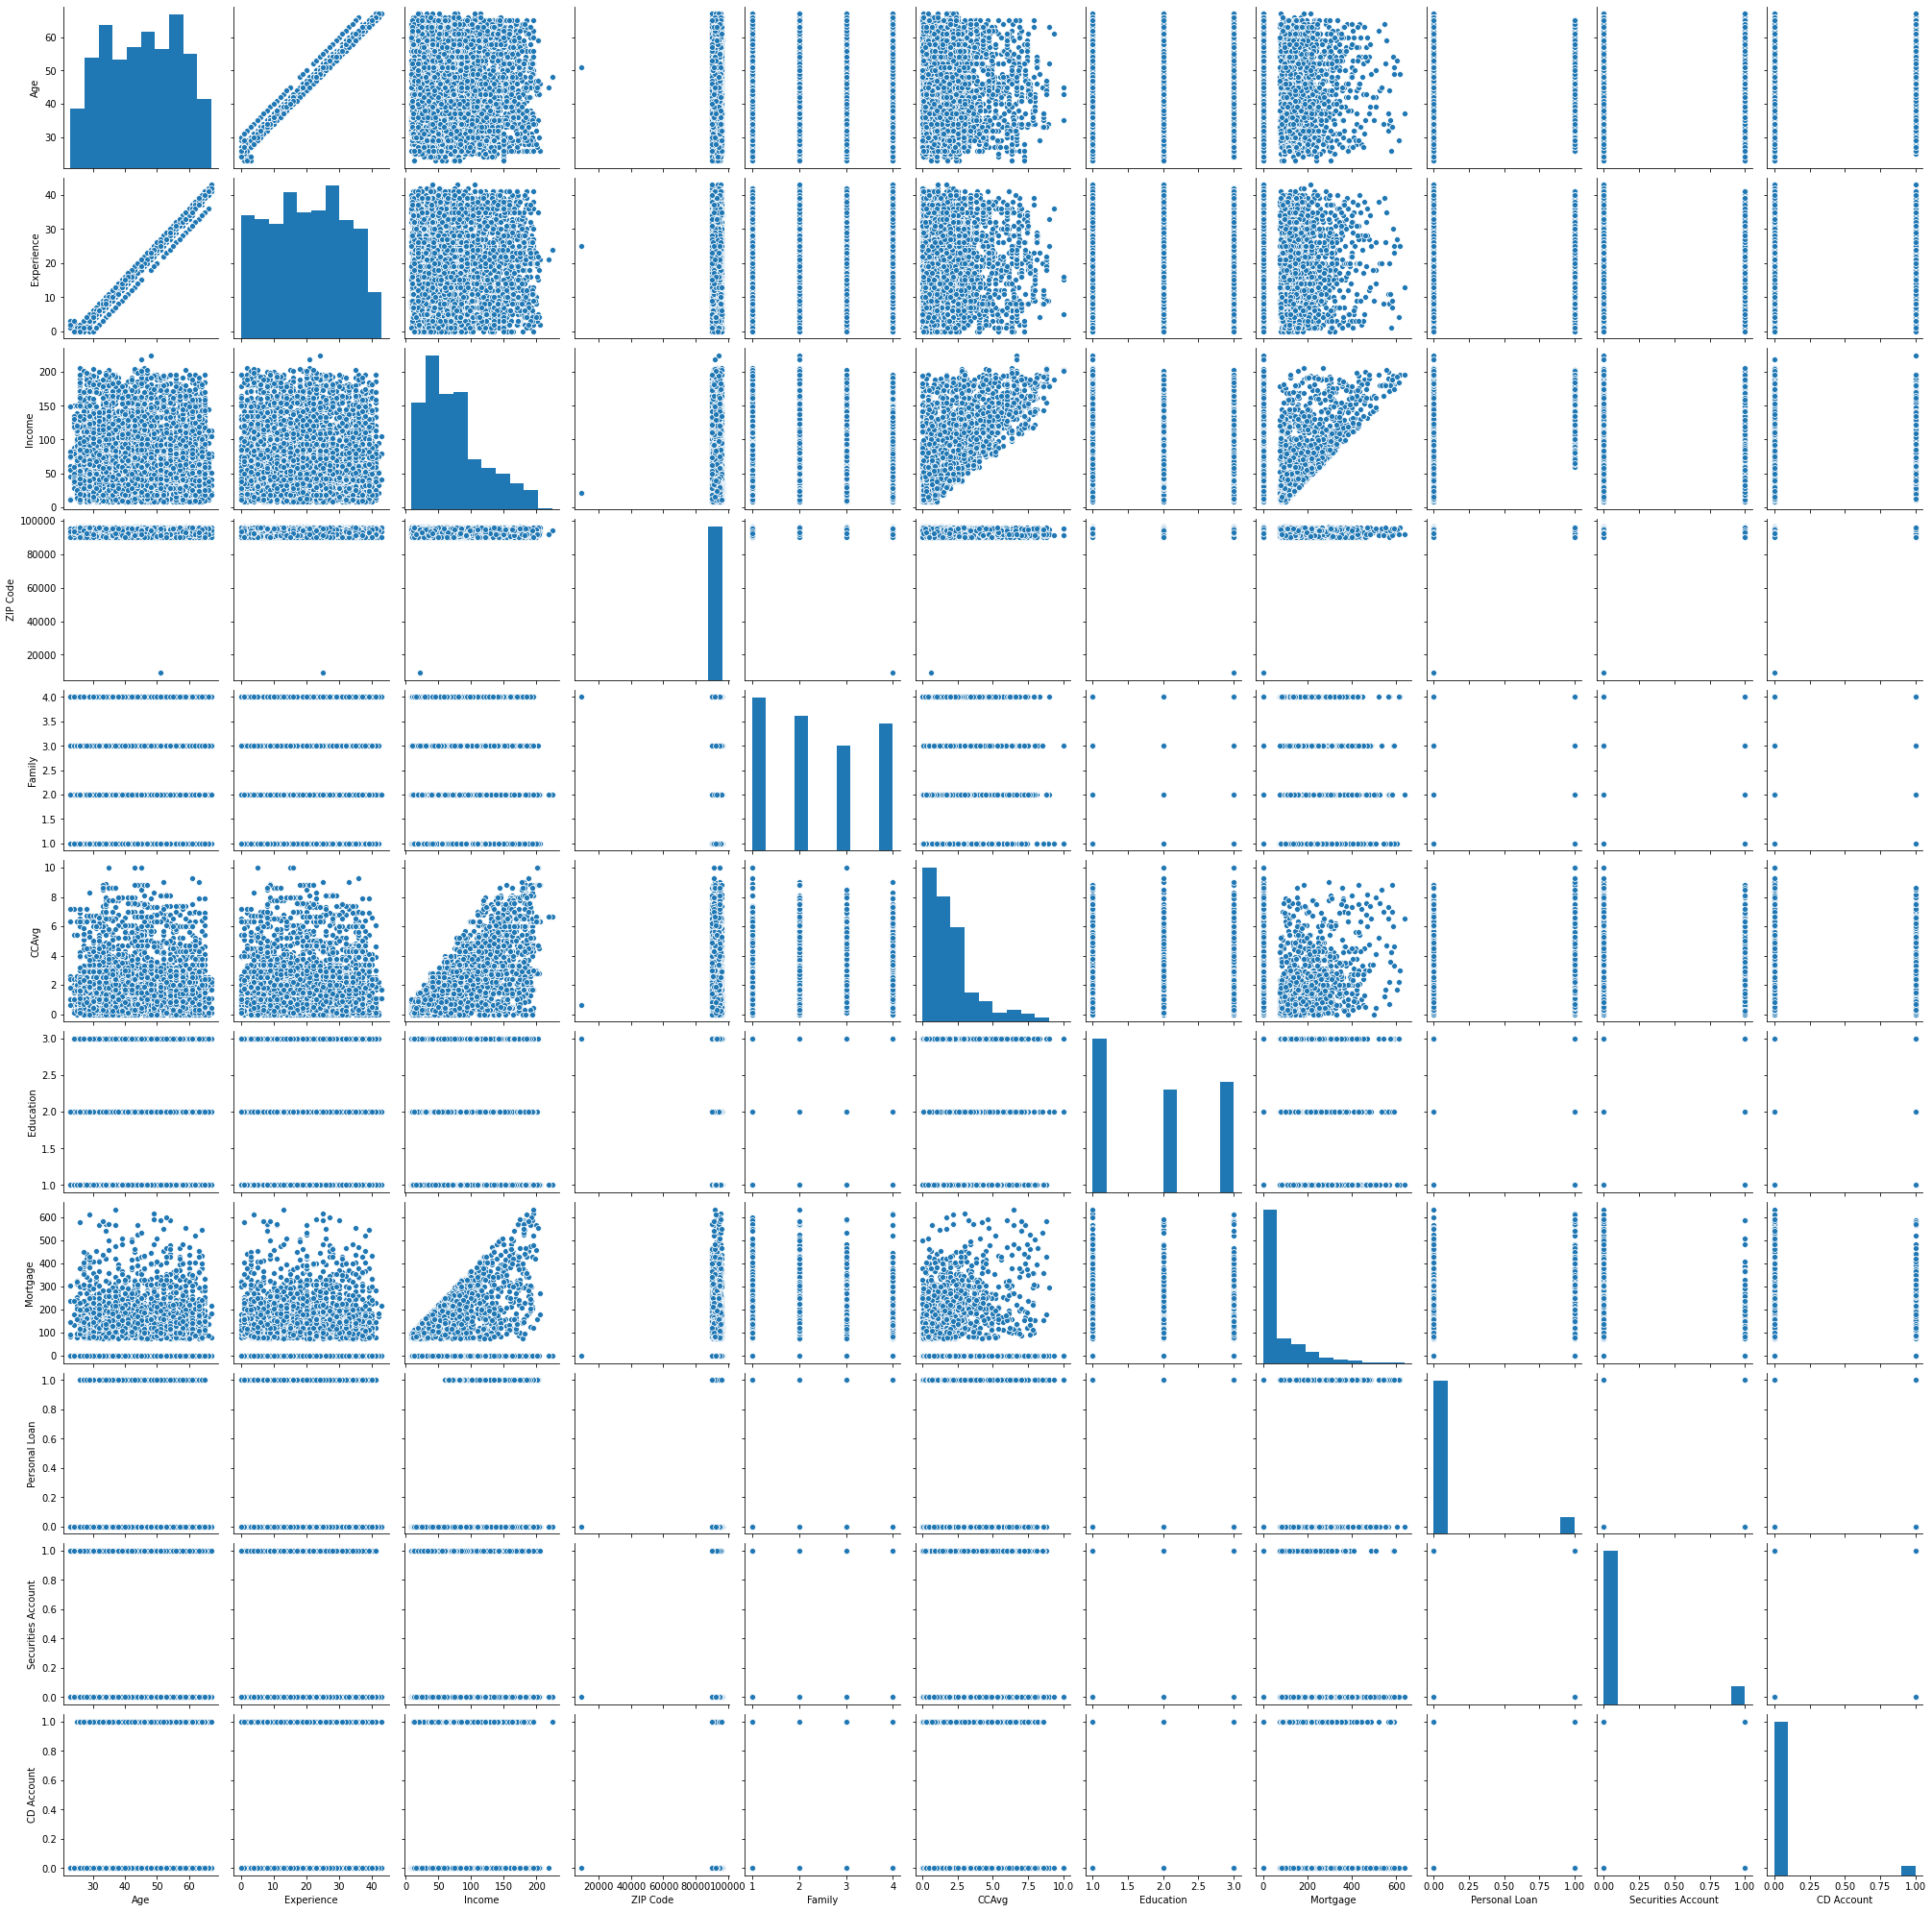

In [113]:
#importing seaborn for statistical plots
import seaborn as sns
df_attr = df_val.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [114]:
df_val.groupby(["Personal Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,479


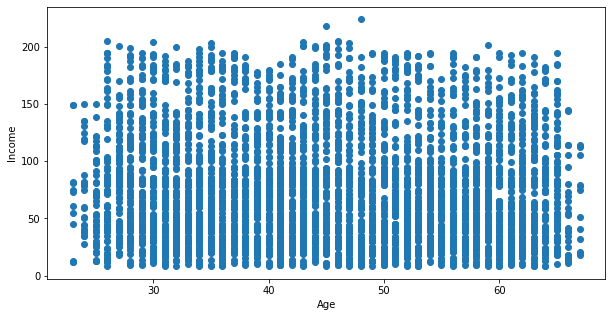

In [115]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df_val['Age'],df_val['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

**There are some outliers in some of the numeric variables as can be seen above. May need outlier treatment**

In [116]:
# Dealing with the negative values in the Experience variable
df_val[df_val.Experience<0].Experience.value_counts()

Series([], Name: Experience, dtype: int64)

**Strong correlation between Age and Experience. Family looks like categorical variable. Income and CCAvg also seem to have a fairly strong positive correlation as can be seen below**

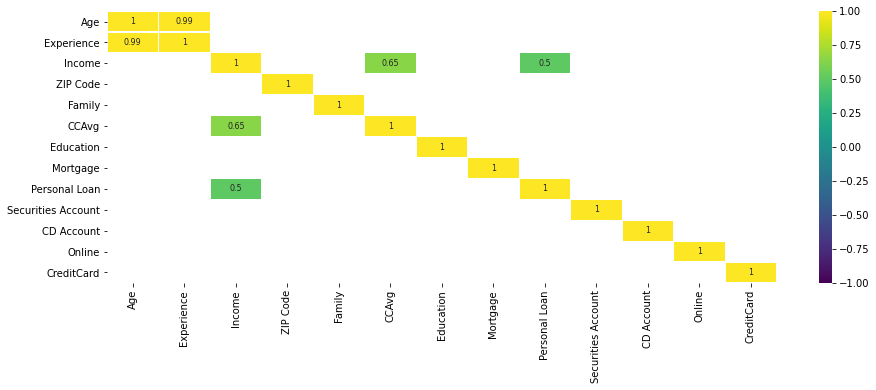

In [117]:
corr=df_val.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

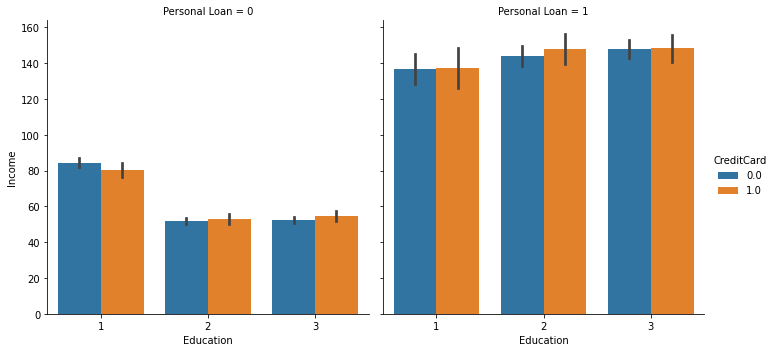

In [118]:
sns.catplot(y='Income', x='Education', kind='bar',col='Personal Loan' , hue='CreditCard',data=df_val)

**People with Higher Income and Higher Education seem to be ones who are more likely take the loan. Use of CreditCard does not seem to make a significant difference.**

In [119]:
pd.crosstab(df_val['Personal Loan'],df_val['CreditCard'])

CreditCard,0.0,1.0
Personal Loan,,
0,3193,1327
1,337,142


Text(0.5, 1.0, 'Loan Vs Family Size')

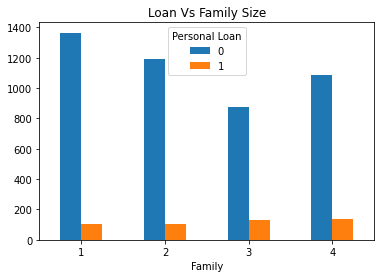

In [120]:
tab=pd.crosstab(df_val['Family'], df_val['Personal Loan'])
tab1=pd.crosstab(df_val['Online'], df_val['Personal Loan'])
tab.plot.bar()
plt.xticks(rotation=0)
plt.title("Loan Vs Family Size")

In [121]:
pd.crosstab(df_val['Family'], df_val['Personal Loan'], normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


**Bigger Families seem to have higher probability of taking the loan**

Family Size has an effect on customer propensity to take the Personal Loan as the p_value (0.0) < 0.05


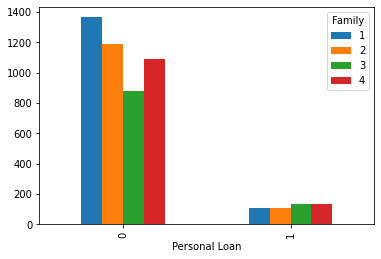

In [122]:
# Chi_square test to check if family size makes any difference to customers taking the loan
Ho = "Familiy Size has no effect on customer propensity to take the Personal Loan" 
Ha = "Family Size has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(df_val['Personal Loan'],df_val['Family'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

Online banking activity has no effect on customer propensity to take the Personal Loan as the p_value (0.693) > 0.05


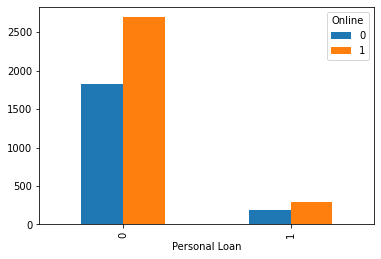

In [123]:
# Chi_square test to check if use of online banking facilities make any difference to customers taking the loan
Ho = "Online banking activity has no effect on customer propensity to take the Personal Loan" 
Ha = "Online banking activity has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(df_val['Personal Loan'],df_val['Online'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

Online banking activity has no effect on customer propensity to take the Personal Loan as the p_value (0.693) > 0.05


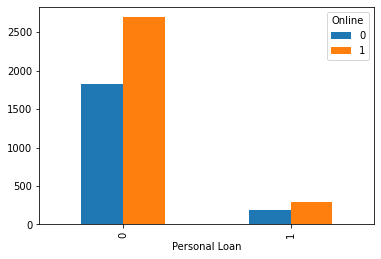

In [124]:
# Chi_square test to check if use of online banking facilities make any difference to customers taking the loan
Ho = "Online banking activity has no effect on customer propensity to take the Personal Loan" 
Ha = "Online banking activity has an effect on customer propensity to take the Personal Loan"

crosstab = pd.crosstab(df_val['Personal Loan'],df_val['Online'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:                                                                    # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.plot.bar()

In [125]:
Temp=df_val[['Family','Education']]
Temp['Family']=Temp['Family'].astype('category')
Temp['Education']=Temp['Education'].astype('category')
Temp=pd.get_dummies(Temp,drop_first=True)
df_val=pd.concat([df_val,Temp], axis=1)

In [126]:
df_val.drop(['Family','Education'],axis=1 ,inplace=True)

In [127]:
df_val.dtypes

ID                     object
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard            float64
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_2             uint8
Education_3             uint8
dtype: object

In [134]:
# Splitting of data to train and test
X=df_val.drop('Personal Loan', axis=1)
Y=df_val.loc[:,'Personal Loan']
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3,stratify = Y, random_state=1)

In [133]:
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)

ValueError: ignored

In [ ]:
Coeff=pd.DataFrame(Logistic.coef_).T
Coeff.index=X_train.columns
Coeff.loc['Intercept']=Logistic.intercept_
Coeff

In [ ]:
Acc_Train_Log1=accuracy_score(y_train, Logistic.predict(X_train))
CM_Log1=confusion_matrix(y_train,Logistic.predict(X_train))
print("Acc_Train_Log1 : %.2f" %Acc_Train_Log1)
print(classification_report(y_train,Logistic.predict(X_train)))
sns.heatmap(CM_Log1, annot=True, fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [ ]:
y_pred=Logistic.predict(X_test)
Acc_Test_Log1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print("Acc : %.2f" %Acc_Test_Log1)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
# Sensitivity for class 1 is only 60% which the modeller want to improve upon
Sensitivity_Log1=0.60
y_prob = Logistic.predict_proba(X_test)
AUC_Log1=roc_auc_score(y_test,y_pred)
print("AUC : %.2f" %AUC_Log1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" %AUC_Log1)
plt.plot([0,1],[0,1],'r-')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")

In [ ]:
#tune the threshold level to improve sensitivity (recall)
y_flag=y_prob[:,1]>0.25
Acc_Test_Log2=accuracy_score(y_test,y_flag)
cm=confusion_matrix(y_test,y_flag)
print(classification_report(y_test, y_flag))
sns.heatmap(cm, annot=True, fmt='g')
AUC_Log2=roc_auc_score(y_test,y_flag)
print("AUC : %.2f" %AUC_Log2)
print("Acc :%.2f" %Acc_Test_Log2)
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Values")
Sensitivity_Log2=0.76

**In this case study we would love to have the sensitivity (i.e. True Positive or Recall) as high as possible and the false negatives as low as possible. By reducing the threshold to 25% we have a much higher recall as well as a higher AUC. If we further decrease the threshold to less than 25, we get better sensitivity but at the cost of higher false negatives. Hence for a balanced and stable outcome, I chose the threshold of 25%.**

In [ ]:
# Try logistic using statsmodel package
import statsmodels.api as sm

In [ ]:
Logreg=sm.Logit(y_train, sm.add_constant(X_train.astype(float))).fit()
print(Logreg.summary())

In [ ]:
#Examine distribution of prediction
kde_res=sm.nonparametric.KDEUnivariate(Logreg.predict())
kde_res.fit()
plt.plot(kde_res.support, kde_res.density)
plt.fill_between(kde_res.support, kde_res.density, alpha=0.3)
plt.title("Distribution of Predictions")

**Density is highest near 0 which means a lot of customers did not respond to the campaign**

In [ ]:
y_prob=Logreg.predict(sm.add_constant(X_test.astype(float)))

In [ ]:
y_pred=y_prob>0.25 #inference taken from previous iteration
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))
Sensitivity_Log3=114/(35+114)
print(Sensitivity_Log3)

In [ ]:
Coeff=pd.DataFrame(Logreg.params, columns=['Coeff'])
Coeff['Odds']=np.exp(Coeff.Coeff)
Coeff['Prob']=Coeff['Odds']/(Coeff.Odds+1)
Coeff.sort_values(by='Odds', ascending=False)
Coeff['pval']=round(Logreg.pvalues,5)
Coeff[Coeff.pval<0.05]

In [ ]:
AUC_Log3=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='AUC : %.2f'%AUC_Log3)
plt.legend(loc='lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1],'r--')
Acc_Log3=accuracy_score(y_test,y_pred)
Acc_Log3

**Decision tree classification**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [ ]:
train_score = dtc.score(X_train,y_train)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(X_test,y_test)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(y_test, y_pred ).round(2)  
print('Precision:', precision_dt)
recall_dt = recall_score(y_test, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc,X_test,y_test)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc,X_test,y_test)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc,X_test,y_test)
plt.title('Precision-Recall Decision Tree Classifier')

**Try K-Nearest neighbour classifier to fit a model

**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

In [ ]:

List=list(np.arange(1,20))
neigbors=list(filter(lambda x: x%2!=0,List))
Accuracy=[]
AUC_KNN=[]

In [ ]:
for n in neigbors:
    knn=KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    Accuracy.append(acc)
    y_prob=knn.predict_proba(X_test)
    AUC=roc_auc_score(y_test,y_prob[:,1])
    AUC_KNN.append(AUC)

MissClassification=[1-x for x in Accuracy]
MissClassification.index(min(MissClassification))
print("Based on misclassification compariosn, optimal n: %i" %neigbors[MissClassification.index(min(MissClassification))])
print("Based on AUC compariosn, optimal n: %i" %neigbors[AUC_KNN.index(max(AUC_KNN))])

In [ ]:
plt.plot(neigbors,MissClassification)

In [ ]:
## final KNN model
KNN=KNeighborsClassifier(n_neighbors=17, metric='euclidean')
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)
Acc_KNN=accuracy_score(y_test,y_pred)
print("Acc_KNN:%.2f"%Acc_KNN)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="g")
plt.ylabel("Actual")
plt.xlabel("predicted")
Sensitivity_KNN=42/(107+42)

In [ ]:
y_prob=KNN.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
AUC_KNN=roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr, label="AUC_KNN: %.2f" %AUC_KNN)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
sns.distplot((y_test-y_predict),bins = 50)

**Try Naive bayes**

In [ ]:
NBC=GaussianNB()
NBC.fit(X_train, y_train)
y_pred=NBC.predict(X_test)

In [ ]:
Acc_NB=accuracy_score(y_test, y_pred)
print("Accuracy : %.2f" %Acc_NB)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
Sensitivity_NB=85/(64+85)

In [ ]:
NBC.predict_proba(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score', metrics.r2_score(y_test,y_pred))

In [ ]:
AUC_NB=roc_auc_score(y_test, NBC.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, NBC.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label ="AUC_NB : %.2f"%AUC_NB)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], 'g--')

In [ ]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(X_test,y_test)
y_pred=k.predict(X_test)

**Try Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
Clf=SVC(kernel='poly', degree=2)
Clf.fit(X_train, y_train)

In [ ]:
y_pred=Clf.predict(X_test)
Acc_SVM=accuracy_score(y_test, y_pred)
print("Acc_SVM :%.2f" %Acc_SVM)
print(classification_report(y_test,y_pred))

In [ ]:
Comparison={'Accuracy':[Acc_Test_Log1, Acc_Test_Log2, Acc_Log3, Acc_KNN, Acc_NB, 0.97],
           'Area Under Curve':[AUC_Log1, AUC_Log2, AUC_Log3, AUC_KNN, AUC_NB, 'Not calculated as it took too much time'],
           'Sensitivity': [Sensitivity_Log1, Sensitivity_Log2, Sensitivity_Log3, Sensitivity_KNN, Sensitivity_NB, 0.77]}
Comparison = pd.DataFrame(Comparison, index=['LogisticVariant1','LogisticVariant2', 'LogisticVariant3','KNN','NaiveBayes', 'SVM_Poly_Kernel'])
Comparison

In [ ]:
plt.plot(Comparison.index,Comparison.Sensitivity, 'g--', label='Sensitivity')
plt.plot(Comparison.index,Comparison.Accuracy, 'r--', label='Accuracy')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title("Evaluation Metrics Comparison")

In [ ]:
### Decision tree gives the best result for both class 0 and class 1
### Given the decision tree gives best result, let us try ensemble of trees 

y_train = np.ravel(y_train)   # converting y_train vector to single dimensional array
rfcl = RandomForestClassifier(random_state=1)

bgcl = BaggingClassifier(n_estimators=20)  #the base_estimator can be null.
#The bagging classifer  will build it's own tree

enclf = VotingClassifier(estimators = [('rf', rfcl), ('bg', bgcl)], voting = 'hard')

for clf, label in zip([rfcl, enclf, bgcl], ['RandomForest', 'Ensemble', 'Bagging']):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_predict))

**In this project, the major gain for the company would be if the model accurately predicts the liability customers who can be converted to personal loan customers. Since the distribution of the target variable is highly skewed in favor of the minority class (i.e. customers who did not turn into personal loan customer in the previous campaign), accuracy as a metric can be very misleading. Hence a more apt mode of comparison of models tried would be AUC and/or Sensitivity (for Class 1). Logistic Regression Variant 2 and 3 have comaparatively higher AUCs and Sensitivity. The SVM model tried with polynomial kernel gave best Sensitivity and highest accuracy score. It may have given better AUC also considering the combination of highest accuracy and highest sensitivity. I could not get it because probability calculation was too much time to be processed. In the absence of SVM results, I would choose Logistic Regression variant 2 or 3 as my final model. The additional advantage with it is that, we get to know the co-efficients of each variable which gives high degree of interpretability of the model used. We can know, for each unit change in the independent variable, what is the shift in the probability of the customer becoming personal customer. We get the odds ratio of all independent variables.

After comparing all the above models we get that,

FOR LOGISTIC REGRESSION MODEL:

Accuracy score on test data is 94.93%.
Accuracy score on train data is 94.94%.
Recall Score : 0.6180555555555556
Precision Score : 0.8090909090909091
f1 score : 0.7007874015748031
Precision Score : 0.8090909090909091
ROC AUC score : 0.8012844149459194
FOR DECISION TREE MODEL:

Accuracy score on test data is 97.86%.

Accuracy score on train data is 99.60%.

Recall score : 0.875

Precision score : 0.9

f1 score : 0.8873239436619719

ROC AUC score : 0.9323377581120944*

FOR RANDOM FOREST MODEL:

Accuracy score on test data is 99.86%.

Accuracy score on train data is 99.48%.

Recall score : 0.8888888888888888

Precision score : 0.9

f1 score : 0.8873239436619719

ROC AUC score : 0.9323377581120944 **